In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data2014= pd.read_csv(f'../hw2/data/output/data-2014.csv')
data2015= pd.read_csv(f'../hw2/data/output/data-2015.csv')
data2016= pd.read_csv(f'../hw2/data/output/data-2016.csv')
data2017= pd.read_csv(f'../hw2/data/output/data-2017.csv')
data2018= pd.read_csv(f'../hw2/data/output/data-2018.csv')
data2019= pd.read_csv(f'../hw2/data/output/data-2019.csv')

/tmp/ipykernel_76088/1389888897.py:4: DtypeWarning: Columns (44,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data2017= pd.read_csv(f'../hw2/data/output/data-2017.csv')


In [3]:
#merge years
years = range(2014, 2020)
dfs = []
for year in years:
    df = pd.read_csv(f'../hw2/data/output/data-{year}.csv')
    dfs.append(df)

# Concatenate into one DataFrame
data = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_76088/2601088650.py:5: DtypeWarning: Columns (44,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'../hw2/data/output/data-{year}.csv')


In [4]:
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,riskscore_partc,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,bid
count,340480.000000,340480.000000,340480.000000,340480.000000,159540.000000,156301.000000,159540.000000,159540.000000,159540.000000,159540.000000,...,289277.000000,289277.000000,289277.000000,289277.000000,245031.000000,245031.000000,245031.000000,245031.000000,245031.000000,278295.000000
mean,37.542458,30031.871358,2016.692049,0.928798,469.753199,19.115089,454.984449,484.696089,464.634085,473.359239,...,0.984945,748.702703,58.894854,2016.614259,105.747434,27.282381,52.406609,26.058445,0.970321,780.451594
std,67.953767,15344.936522,1.722344,0.995021,1780.727658,575.609349,1699.133800,1987.769929,1789.531509,1866.402791,...,0.158033,74.840700,49.077267,1.693134,38.862568,8.895000,24.948987,19.205490,0.123840,133.951489
min,1.000000,1001.000000,2014.000000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,0.398000,214.450000,0.000000,2014.000000,11.540000,0.010000,0.200000,0.000000,0.556000,190.571264
25%,4.000000,17107.000000,2015.000000,0.000000,31.000000,0.707107,30.000000,32.000000,31.000000,32.000000,...,0.887000,706.590000,22.640000,2015.000000,81.310000,20.480000,35.600000,13.675000,0.891000,704.796663
50%,17.000000,29181.000000,2017.000000,0.000000,88.500000,2.121320,86.000000,91.000000,87.000000,90.000000,...,0.985000,752.760000,52.000000,2017.000000,100.100000,26.360000,49.000000,22.700000,0.965000,773.124378
75%,48.000000,42095.000000,2018.000000,2.000000,294.500000,5.656854,286.000000,301.000000,290.000000,297.000000,...,1.080000,797.050000,84.710000,2018.000000,123.030000,34.870000,64.390000,33.365000,1.036000,848.908886
max,999.000000,56045.000000,2019.000000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,2.232000,1053.100000,461.520000,2019.000000,497.010000,70.170000,335.430000,226.840000,2.311000,1881.786543


In [5]:
data.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

### Question 1:

In [6]:
# question 1
q1 = data[data['snp'] == 'No']

# Remove 800-series plans (if planid is float)
q1 = q1[q1['planid'] < 800]

# Keep only plans with Part D (meaning they likely offer Part C in MA context)
q1 = q1[q1['partd'] == 'Yes']

In [7]:
plan_counts = q1.groupby(['year', 'county'])['planid'].nunique().reset_index()

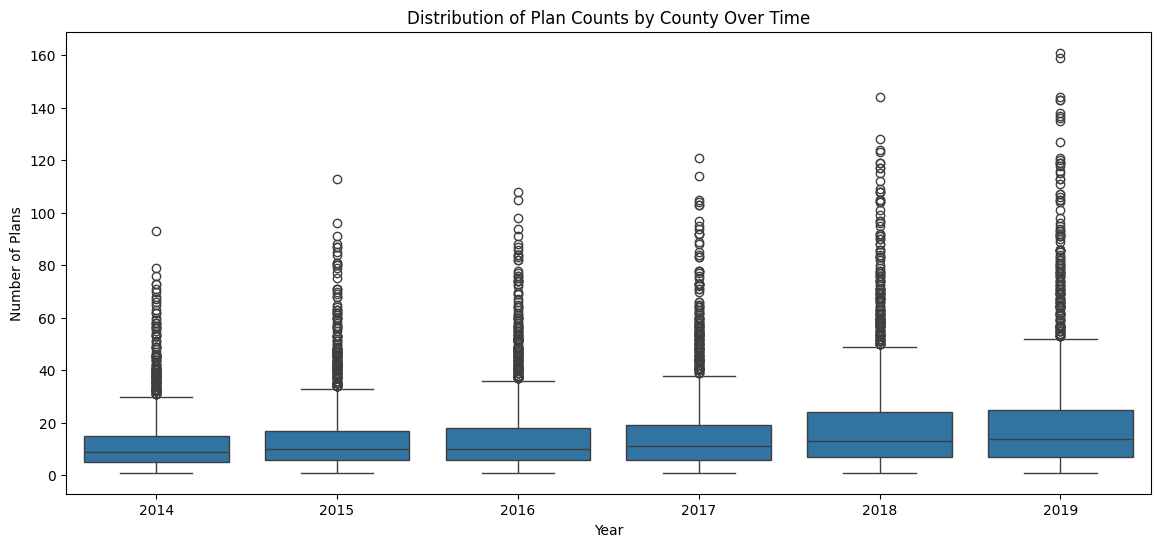

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=plan_counts, x='year', y='planid')
plt.title('Distribution of Plan Counts by County Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.show()

Interpretation: Over time, the number of plans seems to be increasing. The median hovers around 10-15 plans, but there are seemingly more and more extreme outliers as time goes on, with some counties having as much as 160 plan counts in 2019. 10-15 plan types seems to be a reasonable amount of plans, but with there being a visually large amount of outliers across 2014-2019 ranging from 30-160 plans, it seems like there could be too many plans.

### Question 2: 

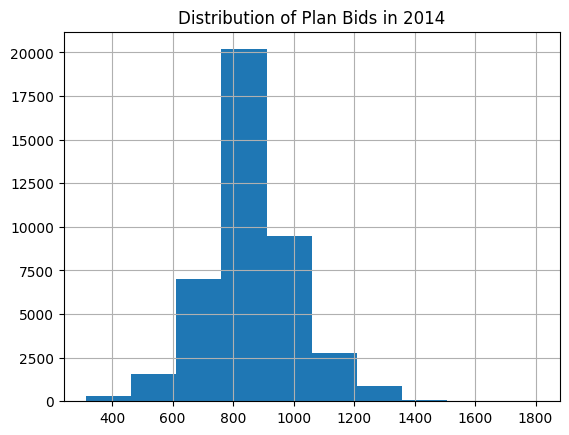

In [9]:
#question 2
data2014['bid'].hist()
plt.title('Distribution of Plan Bids in 2014')
plt.show()

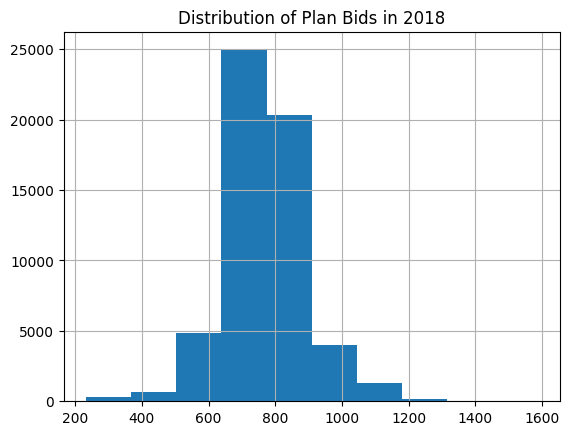

In [10]:
data2018['bid'].hist()
plt.title('Distribution of Plan Bids in 2018')
plt.show()

Over time, the distribution of plan bids has shifted left, with the highest concentration being around 900 in 2014. In 2018, the distribution becomes much narrower and is mainly concentrated around 700. 

### Question 3:

In [11]:
#question 3
data["avg_enrollment"] = pd.to_numeric(data["avg_enrollment"], errors="coerce")
data["avg_enrollment"].notna()

# Compute contract-level enrollment per county-year
contractenrollment = (
    data.groupby(["year", "fips", "contractid"])["avg_enrollment"]
    .sum()
    .reset_index(name="contract_enroll")
)

# Compute total county enrollment
countyenroll = (
    contractenrollment.groupby(["year", "fips"])["contract_enroll"]
    .sum()
    .reset_index(name="county_total")
)

contractenrollment = contractenrollment.merge(
    countyenroll,
    on=["year", "fips"],
    how="left"
)

# Compute market shares and HHI
contractenrollment["share"] = (
    contractenrollment["contract_enroll"]
    / contractenrollment["county_total"]
)

contractenrollment["share_sq"] = contractenrollment["share"] ** 2
county_hhi = (
    contractenrollment.groupby(["year", "fips"])["share_sq"]
    .sum()
    .reset_index(name="hhi")
)

# Average HHI by year
avg_hhi = (
    county_hhi.groupby("year")["hhi"]
    .mean()
    .reset_index(name="avg_hhi")
)

print(avg_hhi)


   year   avg_hhi
0  2014  0.444715
1  2015  0.434334
2  2016  0.440327
3  2017  0.443102
4  2018  0.433823
5  2019  0.400439


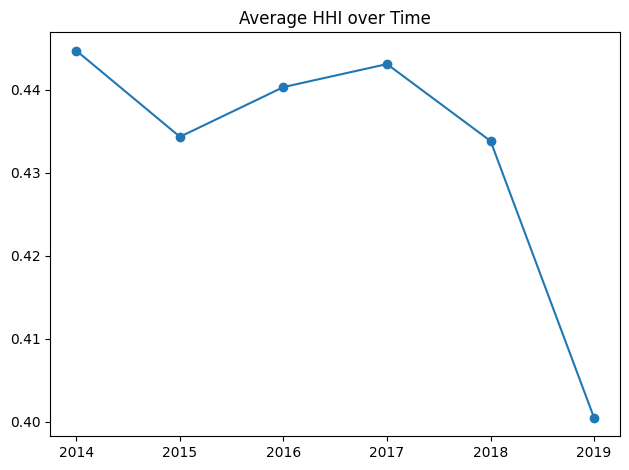

In [12]:
plt.figure()
plt.plot(avg_hhi["year"], avg_hhi["avg_hhi"], marker="o")
plt.title("Average HHI over Time")
plt.tight_layout()
plt.show()

Average HHI staayed mostly constant around .43 to .44 up until 2018. In 2019, average HHI dropped significantly to .4, telling us the market has become more competitive.

### Question 4:

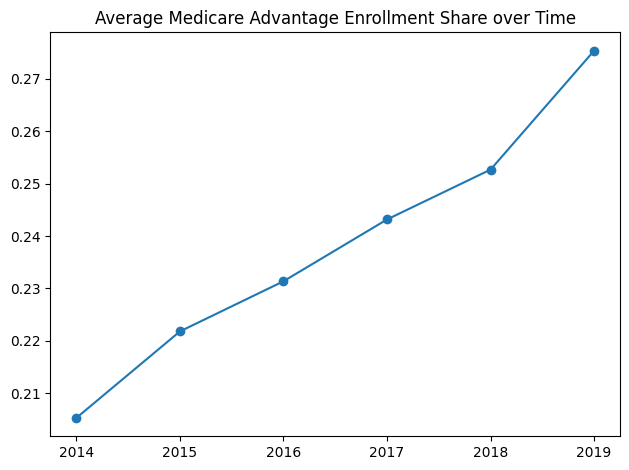

In [13]:
#question 4
pos = (
    data.groupby(["year", "fips"], as_index=False)
       .agg({
           "avg_enrolled": "first",
           "avg_eligibles": "first"
       })
)
pos["ma_share"] = (
    pos["avg_enrolled"] / pos["avg_eligibles"]
)

mashares = (
    pos.groupby("year", as_index=False)["ma_share"]
    .mean()
    .rename(columns={"ma_share": "avg_ma_share"})
)

plt.figure()
plt.plot(mashares["year"], mashares["avg_ma_share"], marker="o")
plt.title("Average Medicare Advantage Enrollment Share over Time")
plt.tight_layout()
plt.show()

Average Medicare Advantage Enrollment compared to eligibles has steadily increased from 2014 to 2019, from around 20% enrollment rate to around 28%.

### Question 5:

In [14]:
#question 5
countytotals = (
    data2018.groupby("fips")["avg_enrollment"]
      .sum()
      .reset_index(name="total_enrollment")
)

data2018 = data2018.merge(countytotals, on="fips", how="inner")

In [15]:
data2018["market_share"] = data2018["avg_enrollment"] / data2018["total_enrollment"]

county_hhi = (
    data2018.groupby("fips")["market_share"]
      .apply(lambda x: np.sum(x ** 2))
      .reset_index(name="hhi")
)

# Define competitive vs uncompetitive
comp = county_hhi["hhi"].quantile(0.33)
unc = county_hhi["hhi"].quantile(0.66)

county_hhi["market_type"] = np.where(
    county_hhi["hhi"] <= comp, "competitive",
    np.where(county_hhi["hhi"] >= unc, "uncompetitive", "mid")
)
county_hhi = county_hhi[county_hhi["market_type"].isin(["competitive", "uncompetitive"])]


data2018 = data2018.merge(county_hhi[["fips", "market_type"]], on="fips", how="inner")

In [16]:
avgbid = (
    data2018.groupby("market_type")["bid"]
      .mean()
      .reset_index(name="avg_bid")
)
print(avgbid)

     market_type     avg_bid
0    competitive  766.228886
1  uncompetitive  772.622669


### Question 6:

In [17]:
#question 6
data2018 = data2018.dropna(
    subset=["bid", "payment_partc", "total_enrollment", "market_type"]
)

# Create quartiles 
data2018["ffs_quartile"] = pd.qcut(
    data2018["payment_partc"],
    4,
    labels=False
)

for q in range(4):
    data2018[f"q{q}"] = (data2018["ffs_quartile"] == q).astype(int)
#checking qs
print(data2018[[f"q{i}" for i in range(4)]].sum())

q0    9856
q1    9884
q2    9938
q3    9743
dtype: int64


In [18]:
table = (
    data2018
    .groupby(["ffs_quartile", "market_type"])["bid"]
    .mean()
    .unstack()
)

table.columns = ["Control Mean Bid", "Treated Mean Bid"]
print(table)

              Control Mean Bid  Treated Mean Bid
ffs_quartile                                    
0                   691.199596        718.357386
1                   781.694478        798.910212
2                   786.459810        783.615659
3                   807.128882        790.141730


### Question 7:

In [19]:
#question 7
from scipy.spatial.distance import cdist

X = data2018[["q0", "q1", "q2"]].values
T = data2018["market_type"].values
Y = data2018["bid"].values

X_treated = X[T == 'uncompetitive']
X_control = X[T == 'competitive']

Y_treated = Y[T == 'uncompetitive']
Y_control = Y[T == 'competitive']

In [20]:
# Nearest neighbor matching (1-to-1) with inverse variance distance based on quartiles of FFS costs
var = np.var(X, axis=0)
inv_var = 1 / var

X_treated_scaled = X_treated * inv_var
X_control_scaled = X_control * inv_var

dist_tc = cdist(X_treated_scaled, X_control_scaled)
match_tc = dist_tc.argmin(axis=1)
effect_tc = Y_treated - Y_control[match_tc]

dist_ct = cdist(X_control_scaled, X_treated_scaled)
match_ct = dist_ct.argmin(axis=1)
effect_ct = Y_treated[match_ct] - Y_control

ate1 = np.mean(np.concatenate([effect_tc, effect_ct]))

print("ATE (Inverse Variance Matching):", ate1)

ATE (Inverse Variance Matching): 20.593875395145883


In [21]:
#Nearest neighbor matching (1-to-1) with Mahalanobis distance based on quartiles of FFS costs

# Covariance matrix
S = np.cov(X, rowvar=False)
S_inv = np.linalg.inv(S)

X_treated = X[T == 'uncompetitive']
X_control = X[T == 'competitive']

Y_treated = Y[T == 'uncompetitive']
Y_control = Y[T == 'competitive']

dist_tc = cdist(X_treated, X_control, metric='mahalanobis', VI=S_inv)
match_tc = dist_tc.argmin(axis=1)
effect_tc = Y_treated - Y_control[match_tc]

dist_ct = cdist(X_control, X_treated, metric='mahalanobis', VI=S_inv)
match_ct = dist_ct.argmin(axis=1)
effect_ct = Y_treated[match_ct] - Y_control

ate2 = np.mean(np.concatenate([effect_tc, effect_ct]))

print("ATE (Mahalanobis Matching):", ate2)

ATE (Mahalanobis Matching): 20.593875395145883


In [30]:
#Inverse propensity weighting, where the propensity scores are based on quartiles of FFS costs
import statsmodels.api as sm
Tnum = np.where(T == "competitive", 0, 1)

X_ps = sm.add_constant(data2018[["q0","q1","q2"]])
logit = sm.Logit(Tnum, X_ps).fit(disp=0)

ps = logit.predict(X_ps)
data2018["ps"] = ps

weights = np.where(Tnum == 1, 1/ps, 1/(1-ps))

ate3 = (
    np.sum(weights * Tnum * Y) / np.sum(weights * Tnum)
    - np.sum(weights * (1-Tnum) * Y) / np.sum(weights * (1-Tnum))
)

print("ATE (Inverse propensity weighting):", ate3)

ATE (Inverse propensity weighting): 6.191027628639517


In [33]:
#Simple linear regression, adjusting for quartiles of FFS costs using dummy variables and appropriate interactions as discussed in class
data2018["T"] = Tnum

for q in range(3):
    data2018[f"T_q{q}"] = data2018["T"] * data2018[f"q{q}"]

X_reg = data2018[["T","q0","q1","q2","T_q0","T_q1","T_q2"]]
X_reg = sm.add_constant(X_reg)

model = sm.OLS(Y, X_reg).fit()

# ATE = average predicted treatment effect
beta_T = model.params["T"]
beta_interactions = np.array([
    model.params["T_q0"],
    model.params["T_q1"],
    model.params["T_q2"],
    0  # reference quartile (q3)
])

quartile_probs = data2018["ffs_quartile"].value_counts(normalize=True).sort_index().values

ate4 = beta_T + np.sum(beta_interactions * quartile_probs)


print("ATE (Regression):", ate4)


ATE (Regression): 6.191027628638736


In [34]:
results = pd.DataFrame({
    "Estimator": [
        "NN Matching (Inverse Variance)",
        "NN Matching (Mahalanobis)",
        "Inverse Propensity Weighting",
        "Regression with Quartile Interactions"
    ],
    "ATE": [
        ate1,
        ate2,
        ate3,
        ate4
    ]
})

print(results)

                               Estimator        ATE
0         NN Matching (Inverse Variance)  20.593875
1              NN Matching (Mahalanobis)  20.593875
2           Inverse Propensity Weighting   6.191028
3  Regression with Quartile Interactions   6.191028


### Question 8:
The Nearest Neighbors Matching with Inverse Variance and Mahalanobis were identical, while the Inverse Propensity Weighting and Regression were identical, but these two groups were very different compared to each other.

### Question 9:

In [35]:
#Question 9
#Estimator of choice: regression

X_cont = data2018[["T","payment_partc","total_enrollment"]]
X_cont = sm.add_constant(X_cont)

model_cont = sm.OLS(Y, X_cont).fit()

ate9 = model_cont.params["T"]

print("ATE (Regression – Continuous Controls):", ate9)

ATE (Regression – Continuous Controls): -2.622298718964715


The ATE calculated here is very different than what we saw in question 7 using the quartiles. The ATE is negative as well, telling us the treatment (in this case is an uncompetitive market) has a negative effect on bids.

### Question 10:
Overall, I was definitely challenged but was still able to understand what was going on for this homework. I ran into many issues reading the raw data and cleaning it up, but eventually worked through it. I found the first part of this assignment to not be too challenging, as I have had experience before with simple data visualization in python. However, the second part (question 5 and onward) definitely was quite confusing. I definitely had to use outside resources to help figure out what code and additional libraries/functions I needed in order to calculate ATEs as this was new to me. One thing that was challenging/aggrevating is realizing I was missing something that needed to be downloaded or having a small error or typo that would require me to restart everything, but it eventually worked out.